<a href="https://colab.research.google.com/github/serrve1/AlphaRisk/blob/main/%ED%9B%84%EB%B3%B4%ED%94%BC%EC%B2%98(%EC%A6%9D%EA%B0%80%EC%9C%A8%2C%EC%A3%BC%EA%B0%80%EB%B9%84%EC%9C%A8ver2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 현섭 코드
#####나중에 PER,PCR,PBR,PSR만 활용할 예정이고 음수값은 0으로 대체하였음(분류에서는 부적절 할 수 있음)

In [ ]:
# 비재무 피쳐인 주가(12월말 기준), 평균유통주식수를 이용
# 매출액 (PSR),  당기순이익(PER), 평균총자본(PBR), 현금흐름(PCR)

path ='/content/drive/MyDrive/프로젝트2/데이터수집/새로운피쳐추가.csv'

df = pd.read_csv(path, encoding='cp949')
df.head()
print(f"전체 기업의 수 : {len(df['거래소코드'].unique())}")
print(f"원본 행의 수 : {len(df)}")

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.columns

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum()

In [ ]:
asd = df.copy()
df['매출액'] = df['매출액(수익)(*)(IFRS연결)(천원)']*1000
# df['매출액'].fillna(df['매출액(수익)(*)(IFRS)(천원)']*1000, inplace = True)
# df['매출액']

In [ ]:
# 1순위는 연결이고, 연결이 없는 경우에는 개별을 적용 (x)
list_ = ['회사명','거래소코드','회계년도','종가(원)','매출액','영업이익','당기순이익','자산','자본','부채','발행주식수','비유동자산','유동자산','유형자산','영업활동으로인한 현금흐름']

df['발행주식수'] = df['* 발행한 주식총수(*)(IFRS연결)(천원)']
df['발행주식수'].fillna(df['* 발행한 주식총수(*)(IFRS)(천원)'], inplace = True)

df['매출액'] = df['매출액(수익)(*)(IFRS연결)(천원)']*1000
df['매출액'].fillna(df['매출액(수익)(*)(IFRS)(천원)']*1000, inplace = True)

df['영업이익'] = df['계속영업이익(손실)(IFRS연결)(천원)']*1000
df['영업이익'].fillna(df['계속영업이익(손실)(IFRS)(천원)']*1000, inplace = True)

df['당기순이익'] = df['당기순이익(손실)(IFRS연결)(천원)']*1000
df['당기순이익'].fillna(df['당기순이익(손실)(IFRS)(천원)']*1000, inplace = True)

df['자산'] = df['자산(*)(IFRS연결)(천원)']*1000
df['자산'].fillna(df['자산(*)(IFRS)(천원)']*1000, inplace = True)

df['자본'] = df['자본(*)(IFRS연결)(천원)']*1000
df['자본'].fillna(df['자본(*)(IFRS)(천원)']*1000, inplace = True)

df['부채'] = df['부채(*)(IFRS연결)(천원)']*1000
df['부채'].fillna(df['부채(*)(IFRS)(천원)']*1000, inplace = True)

df['비유동자산'] = df['비유동자산(*)(IFRS연결)(천원)']*1000
df['비유동자산'].fillna(df['비유동자산(*)(IFRS)(천원)']*1000, inplace = True)

df['유동자산'] = df['유동자산(*)(IFRS연결)(천원)']*1000
df['유동자산'].fillna(df['유동자산(*)(IFRS)(천원)']*1000, inplace = True)

df['유형자산'] = df['유형자산(*)(IFRS연결)(천원)']*1000
df['유형자산'].fillna(df['유형자산(*)(IFRS)(천원)']*1000, inplace = True)

df['영업활동으로 인한 현금흐름'] = df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)']*1000
df['영업활동으로 인한 현금흐름'].fillna(df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)']*1000, inplace = True)

In [ ]:
df.drop(columns=['매출액(수익)(*)(IFRS)(천원)',
       '매출액(수익)(*)(IFRS연결)(천원)', '계속영업이익(손실)(IFRS)(천원)',
       '계속영업이익(손실)(IFRS연결)(천원)', '당기순이익(손실)(IFRS)(천원)',
       '당기순이익(손실)(IFRS연결)(천원)', '자산(*)(IFRS)(천원)', '자산(*)(IFRS연결)(천원)',
       '자본(*)(IFRS)(천원)', '자본(*)(IFRS연결)(천원)', '부채(*)(IFRS)(천원)',
       '부채(*)(IFRS연결)(천원)', '* 발행한 주식총수(*)(IFRS)(천원)',
       '* 발행한 주식총수(*)(IFRS연결)(천원)', '비유동자산(*)(IFRS)(천원)',
       '비유동자산(*)(IFRS연결)(천원)', '유동자산(*)(IFRS)(천원)', '유동자산(*)(IFRS연결)(천원)',
       '유형자산(*)(IFRS)(천원)', '유형자산(*)(IFRS연결)(천원)',
       '영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)',
       '영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)'], inplace=True)

NameError: name 'df' is not defined

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

'매출액증가율' = 매출액
'총자본증가율' = 총자산
'정상영업이익증가율' = 영업이익
'순이익증가율' = 당기순이익
'유동자산증가율' = 유동자산
'비유동자산증가율' = 비유동자산
'유형자산증가율' = 유형자산

** 증가율식은 2020년부터 : 당기X - 전기X / 전기X

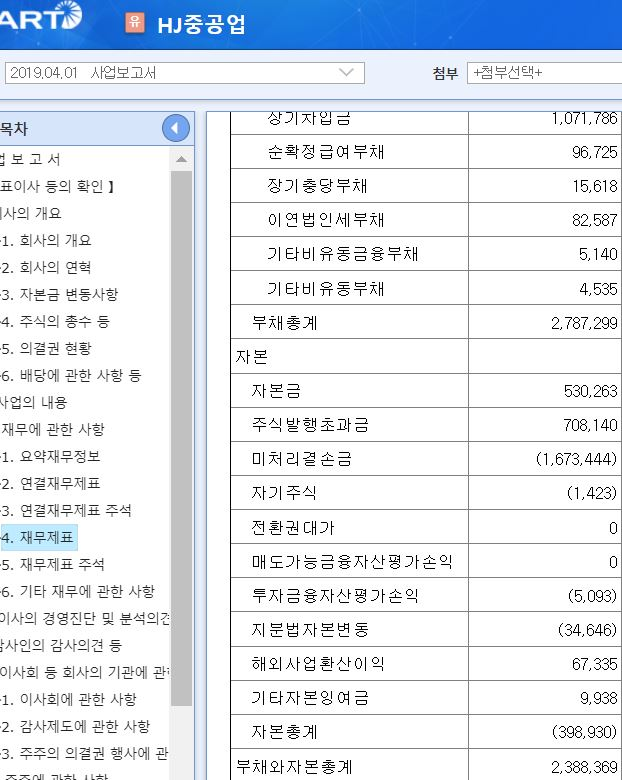#PER/PBR 등은 단순하게 구하는 것으로...
PER = 주가/당기순이익/유통주식수
PBR = 주가/자기자본/유통주식수
PCR = 주가/영업활동현금흐름/유통주식수
PSR = 주가/매출액/유통주식수

In [ ]:
df['당기순이익'].describe()

In [ ]:
df['매출액'].value_counts()
df['매출액'].describe()

음수 PER 등은 날리는 것이 좋아보임
참고 : https://buffettlab.co.kr/m/view.php?idx=37676, 버핏연구소

In [ ]:
# 계산량이 매우 많아 시간이 필요
# 레이블 초기화
df['매출액증가율'] = 0
df['영업이익증가율'] = 0
df['순이익증가율'] = 0
df['총자본증가율'] = 0
df['유동자산증가율'] = 0
df['비유동자산증가율'] = 0
df['유형자산증가율'] = 0
df['PER'] = 0
df['PBR'] = 0
df['PCR'] = 0
df['PSR'] = 0
# 회사명으로 그룹화하여 각 회사별로 처리
# company는 회사명 : 예를들면 (A회사), group은 'A회사'의 데이터 전부
for company, group in df.groupby('회사명'):
    for i in range(len(group)):
        if i >= 1:
            group['매출액증가율'].iloc[i] = (group['매출액'].iloc[i] - group['매출액'].iloc[i-1]) / (group['매출액'].iloc[i-1])
            group['영업이익증가율'].iloc[i] = (group['영업이익'].iloc[i] - group['영업이익'].iloc[i-1]) / group['영업이익'].iloc[i-1]
            group['순이익증가율'].iloc[i] = (group['당기순이익'].iloc[i] - group['당기순이익'].iloc[i-1]) / group['당기순이익'].iloc[i-1]
            group['총자본증가율'].iloc[i] = (group['자산'].iloc[i] - group['자산'].iloc[i-1]) / group['자산'].iloc[i-1]
            group['유동자산증가율'].iloc[i] = (group['유동자산'].iloc[i] - group['유동자산'].iloc[i-1]) / group['유동자산'].iloc[i-1]
            group['비유동자산증가율'].iloc[i] = (group['비유동자산'].iloc[i] - group['비유동자산'].iloc[i-1]) / group['비유동자산'].iloc[i-1]
            group['유형자산증가율'].iloc[i] = (group['유형자산'].iloc[i] - group['유형자산'].iloc[i-1]) / group['유형자산'].iloc[i-1]
# ver2. 발행주식수도 전기 & 당기 평균으로 조정하였음
# 밑의 코드를 따로 작성하여 CSV로 받지 않았으나 퀀트 전략시 이 코드 참고하여 조정
# 만약에 분류 피쳐로 쓸거면 0으로 대체하면 안된다고 생각함.
            group['PER'].iloc[i] = (group['종가(원)'].iloc[i]) / ((group['당기순이익'].iloc[i]) / ((group['발행주식수'].iloc[i] + group['발행주식수'].iloc[i-1])/2))
            group['PBR'].iloc[i] = (group['종가(원)'].iloc[i]) / (((group['자본'].iloc[i]+group['자본'].iloc[i-1])/2) /((group['발행주식수'].iloc[i] + group['발행주식수'].iloc[i-1])/2))
            group['PSR'].iloc[i] = (group['종가(원)'].iloc[i]) / ((group['매출액'].iloc[i]) / ((group['발행주식수'].iloc[i] + group['발행주식수'].iloc[i-1])/2))
            group['PCR'].iloc[i] = (group['종가(원)'].iloc[i]) / ((group['영업활동으로 인한 현금흐름'].iloc[i]) /((group['발행주식수'].iloc[i] + group['발행주식수'].iloc[i-1])/2))
            if (group['PER'].iloc[i] < 0) or (group['당기순이익'].iloc[i] == 0):
                group['PER'].iloc[i] = 0
            if (group['PBR'].iloc[i] < 0) or (group['자본'].iloc[i] == 0):
                group['PBR'].iloc[i] = 0
            if (group['PCR'].iloc[i] < 0) or (group['영업활동으로 인한 현금흐름'].iloc[i] == 0):
                group['PCR'].iloc[i] = 0
            if (group['PSR'].iloc[i] < 0) or (group['매출액'].iloc[i] <= 0) :
                group['PSR'].iloc[i] = 0
    df.loc[group.index[1:]] = group.iloc[1:]


In [ ]:
# 각 그룹의 맨 첫행을 삭제, 왜냐하면 첫행은 증가율 자료가 없기 때문
import pandas as pd
grouped = df.groupby('회사명')
group_list = [group.iloc[1:] for _, group in grouped]
new_df = pd.concat(group_list)
df = new_df.copy()

In [ ]:
df[['회사명','회계년도','매출액증가율','PER']]

In [ ]:
df[['PER','PBR','PSR','PCR']].value_counts()

In [ ]:
df[['PER','PBR','PSR','PCR']].describe()

In [ ]:
# PSR이 조금 이상하여 산식도 수정했지만 문제 없었음
# inf인 값 확인 , 매출액이 0인 경우 때문이었음 따라서 매출액이 0인경우 PSR = 0으로 대체하였고
# PSR이 0인 경우는 퀀트 전략에서 사용하지 않는 것으로 처리해야함
# 즉, PER, PBR, PCR, PER이 낮은 것을 선택하는 전략을 취하더라도 0인 경우는 제외하도록 코딩해야함, 이를 점검하기
df[['회사명','거래소코드','회계년도','PSR','매출액']][df['PSR'] == np.inf]

In [ ]:
# PBR < 0은  자본이 음수인듯, 굉장한 부실화됨
#HJ중공업의 18/12 사업보고서를 살펴보니 실제로 그 해에 자본이 음수였음
df[df['PBR'] < 0]

In [ ]:
# PBR은 괜찮지만
# PER,PCR, PSR은 음수인 경우 숫자가 왜곡될 수 있음을 기억해야한다. 그래서 처리 방법에 대하여 논의하여야한다.
# 분류모델에 적용할 것이 아니고 퀀트에만 적용할 것이기 때문에
#PER,PBR,PCR 을 모두 = 0으로 대체하였다. 분류모델에 적용한다면 PER 등이 0으로 모두 같은 피처 값을 가진 것으로 판단하는 오류가 있기 때문에 이렇게 적용하면 안될듯
# PER의 경우 예를들면 주가 100억 / (당기순이익= -10억  / 주식수= 1이라고 치자, PER = -10인데, 당기순이익 = -1억이라면, 오히려 PER이 매우 작아진다. PER = -100)

In [ ]:
# df.to_csv('/content/drive/MyDrive/프로젝트2/일부피쳐조정.csv', encoding = 'cp949', index=True)

In [ ]:
df[['당기순이익', '영업이익','회사명']]

In [ ]:
df[df['회사명'] == '삼성전자(주)'][['당기순이익', '영업이익','회사명']]

## 현섭코드 재활용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 비재무 피쳐인 주가(12월말 기준), 평균유통주식수를 이용
# 매출액 (PSR),  당기순이익(PER), 평균총자본(PBR), 현금흐름(PCR)

path ='/content/drive/MyDrive/프로젝트2/데이터수집/성장성피쳐.csv'

orgin = pd.read_csv(path, encoding='cp949')
file_df = orgin.copy()
file_df.head()
print(f"전체 기업의 수 기업의 수 : {len(file_df['회사명'].unique())}")
print(f"원본 행의 수 : {len(file_df)}")

전체 기업의 수 기업의 수 : 2973
원본 행의 수 : 28628


In [ ]:
file_df[file_df['회사명']=='삼성전자(주)'][['회사명','회계년도','[제조]   비유동자산(*)(IFRS연결)(천원)']]

,회사명,회계년도,[제조] 비유동자산(*)(IFRS연결)(천원)
20828,삼성전자(주),2011/12,8.412919e+10
20829,삼성전자(주),2012/12,9.380255e+10
20830,삼성전자(주),2013/12,1.033147e+11
20831,삼성전자(주),2014/12,1.152769e+11
20832,삼성전자(주),2015/12,1.173648e+11
20833,삼성전자(주),2016/12,1.207446e+11
20834,삼성전자(주),2017/12,1.547696e+11
20835,삼성전자(주),2018/12,1.646598e+11
20836,삼성전자(주),2019/12,1.711792e+11
20837,삼성전자(주),2020/12,1.800201e+11


In [ ]:
file_df.head()

,회사명,거래소코드,회계년도,종가(원),[제조]매출액(수익)(*)(IFRS)(천원),[제조]매출액(수익)(*)(IFRS연결)(천원),[제조]당기순이익(손실)(IFRS)(천원),[제조]* (정상)영업손익(보고서기재)(IFRS)(천원),[제조]* (정상)영업손익(보고서기재)(IFRS연결)(천원),[제조]당기순이익(손실)(IFRS연결)(천원),...,[제조]* 발행한 주식총수(*)(IFRS)(천원),[제조]* 발행한 주식총수(*)(IFRS연결)(천원),[제조] 비유동자산(*)(IFRS)(천원),[제조] 비유동자산(*)(IFRS연결)(천원),[제조] 유동자산(*)(IFRS)(천원),[제조] 유동자산(*)(IFRS연결)(천원),[제조] 유형자산(*)(IFRS)(천원),[제조] 유형자산(*)(IFRS연결)(천원),[제조]영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),[제조]영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)
0,(주)BNK금융지주,138930,2011/12,11050.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(주)BNK금융지주,138930,2012/12,13200.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(주)BNK금융지주,138930,2013/12,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(주)BNK금융지주,138930,2014/12,14500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(주)BNK금융지주,138930,2015/12,8420.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
file_df

,회사명,거래소코드,회계년도,종가(원),[제조]매출액(수익)(*)(IFRS)(천원),[제조]매출액(수익)(*)(IFRS연결)(천원),[제조]당기순이익(손실)(IFRS)(천원),[제조]* (정상)영업손익(보고서기재)(IFRS)(천원),[제조]* (정상)영업손익(보고서기재)(IFRS연결)(천원),[제조]당기순이익(손실)(IFRS연결)(천원),...,[제조]* 발행한 주식총수(*)(IFRS)(천원),[제조]* 발행한 주식총수(*)(IFRS연결)(천원),[제조] 비유동자산(*)(IFRS)(천원),[제조] 비유동자산(*)(IFRS연결)(천원),[제조] 유동자산(*)(IFRS)(천원),[제조] 유동자산(*)(IFRS연결)(천원),[제조] 유형자산(*)(IFRS)(천원),[제조] 유형자산(*)(IFRS연결)(천원),[제조]영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),[제조]영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)
0,(주)BNK금융지주,138930,2011/12,11050.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(주)BNK금융지주,138930,2012/12,13200.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(주)BNK금융지주,138930,2013/12,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(주)BNK금융지주,138930,2014/12,14500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(주)BNK금융지주,138930,2015/12,8420.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28623,흥아해운(주),3280,2019/12,481.0,97376909.0,102166838.0,-52550693.0,-14756167.0,-12364293.0,-51356551.0,...,112112392.0,112112392.0,325367989.0,337152599.0,61182850.0,93810124.0,237825418.0,238913893.0,-16943933.0,-12048291.0
28624,흥아해운(주),3280,2020/12,258.0,85455349.0,88938838.0,-37397763.0,-4227716.0,-5797543.0,-50876456.0,...,116732559.0,116732559.0,233491761.0,227681309.0,51275586.0,59094649.0,179476647.0,179753596.0,-1438708.0,-3958237.0
28625,흥아해운(주),3280,2021/12,2700.0,81724314.0,81724314.0,15770398.0,-1851887.0,-1874689.0,16436494.0,...,240424899.0,240424899.0,194314969.0,192035072.0,53674943.0,55263611.0,142140392.0,142173273.0,-2537073.0,-2635682.0
28626,흥아해운(주),3280,2022/12,1355.0,146029641.0,177860078.0,13941742.0,25067057.0,29679322.0,23809909.0,...,240424899.0,240424899.0,217762570.0,212018300.0,75237299.0,105041636.0,164293206.0,166069826.0,27803644.0,32737334.0


In [ ]:
file_df.columns

Index(['회사명', '거래소코드', '회계년도', '종가(원)', '[제조]매출액(수익)(*)(IFRS)(천원)',
       '[제조]매출액(수익)(*)(IFRS연결)(천원)', '[제조]당기순이익(손실)(IFRS)(천원)',
       '[제조]* (정상)영업손익(보고서기재)(IFRS)(천원)', '[제조]* (정상)영업손익(보고서기재)(IFRS연결)(천원)',
       '[제조]당기순이익(손실)(IFRS연결)(천원)', '[제조]자산(*)(IFRS)(천원)',
       '[제조]자산(*)(IFRS연결)(천원)', '[제조]자본(*)(IFRS)(천원)', '[제조]자본(*)(IFRS연결)(천원)',
       '[제조]부채(*)(IFRS)(천원)', '[제조]부채(*)(IFRS연결)(천원)',
       '[제조]* 발행한 주식총수(*)(IFRS)(천원)', '[제조]* 발행한 주식총수(*)(IFRS연결)(천원)',
       '[제조]   비유동자산(*)(IFRS)(천원)', '[제조]   비유동자산(*)(IFRS연결)(천원)',
       '[제조]   유동자산(*)(IFRS)(천원)', '[제조]   유동자산(*)(IFRS연결)(천원)',
       '[제조]      유형자산(*)(IFRS)(천원)', '[제조]      유형자산(*)(IFRS연결)(천원)',
       '[제조]영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)',
       '[제조]영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)'],
      dtype='object')

In [ ]:
len(file_df.columns)

26

In [ ]:
# 컬럼명을 변경합니다.
file_df.columns
컬럼변경 = ['회사명', '거래소코드', '회계년도', '종가(원)', '매출액(IFRS)',
       '매출액(IFRS연결)', '당기순이익(IFRS)','영업손익(IFRS)','영업손익(IFRS연결)',
       '당기순이익(IFRS연결)', '자산(IFRS)', '자산(IFRS연결)',
       '자본(IFRS)', '자본(IFRS연결)', '부채(IFRS)',
       '부채(IFRS연결)', '발행한 주식총수(IFRS)',
       '발행한 주식총수(IFRS연결)', '비유동자산(IFRS)',
       '비유동자산(IFRS연결)', '유동자산(IFRS)', '유동자산(IFRS연결)',
       '유형자산(IFRS)', '유형자산(IFRS연결)',
       '영업활동으로 인한 현금흐름(IFRS)',
       '영업활동으로 인한 현금흐름(IFRS연결)']
len(컬럼변경)
file_df.columns = 컬럼변경

In [ ]:
for col in file_df.columns[4:25]:
    count_zero = (file_df[col] == 0).sum()
    print(f"컬럼 '{col}'에 0이 있는 행 개수: {count_zero}")

컬럼 '매출액(IFRS)'에 0이 있는 행 개수: 65
컬럼 '매출액(IFRS연결)'에 0이 있는 행 개수: 20
컬럼 '당기순이익(IFRS)'에 0이 있는 행 개수: 3
컬럼 '영업손익(IFRS)'에 0이 있는 행 개수: 3
컬럼 '영업손익(IFRS연결)'에 0이 있는 행 개수: 1
컬럼 '당기순이익(IFRS연결)'에 0이 있는 행 개수: 1
컬럼 '자산(IFRS)'에 0이 있는 행 개수: 1
컬럼 '자산(IFRS연결)'에 0이 있는 행 개수: 1
컬럼 '자본(IFRS)'에 0이 있는 행 개수: 1
컬럼 '자본(IFRS연결)'에 0이 있는 행 개수: 1
컬럼 '부채(IFRS)'에 0이 있는 행 개수: 1
컬럼 '부채(IFRS연결)'에 0이 있는 행 개수: 1
컬럼 '발행한 주식총수(IFRS)'에 0이 있는 행 개수: 1
컬럼 '발행한 주식총수(IFRS연결)'에 0이 있는 행 개수: 3
컬럼 '비유동자산(IFRS)'에 0이 있는 행 개수: 2
컬럼 '비유동자산(IFRS연결)'에 0이 있는 행 개수: 1
컬럼 '유동자산(IFRS)'에 0이 있는 행 개수: 1
컬럼 '유동자산(IFRS연결)'에 0이 있는 행 개수: 1
컬럼 '유형자산(IFRS)'에 0이 있는 행 개수: 54
컬럼 '유형자산(IFRS연결)'에 0이 있는 행 개수: 8
컬럼 '영업활동으로 인한 현금흐름(IFRS)'에 0이 있는 행 개수: 10


In [ ]:
# 계산량이 매우 많아 시간이 필요
# 레이블 초기화
file_df['매출액증가율(IFRS)'] = 0
file_df['영업이익증가율(IFRS)'] = 0
file_df['순이익증가율(IFRS)'] = 0
file_df['총자본증가율(IFRS)'] = 0
file_df['유동자산증가율(IFRS)'] = 0
file_df['비유동자산증가율(IFRS)'] = 0
file_df['유형자산증가율(IFRS)'] = 0
# df['PER'] = 0
# df['PBR'] = 0
# df['PCR'] = 0
# df['PSR'] = 0
# 회사명으로 그룹화하여 각 회사별로 처리
# company는 회사명 : 예를들면 (A회사), group은 'A회사'의 데이터 전부
for company, group in file_df.groupby('거래소코드'):
    for i in range(len(group)):
        if i >= 1:
            group['매출액증가율(IFRS)'].iloc[i] = (group['매출액(IFRS)'].iloc[i] - group['매출액(IFRS)'].iloc[i-1]) / abs((group['매출액(IFRS)'].iloc[i-1])) * 100
            group['영업이익증가율(IFRS)'].iloc[i] = (group['영업손익(IFRS)'].iloc[i] - group['영업손익(IFRS)'].iloc[i-1]) / abs(group['영업손익(IFRS)'].iloc[i-1]) * 100
            group['순이익증가율(IFRS)'].iloc[i] = (group['당기순이익(IFRS)'].iloc[i] - group['당기순이익(IFRS)'].iloc[i-1]) / abs(group['당기순이익(IFRS)'].iloc[i-1]) * 100
            group['총자본증가율(IFRS)'].iloc[i] = (group['자산(IFRS)'].iloc[i] - group['자산(IFRS)'].iloc[i-1]) / abs(group['자산(IFRS)'].iloc[i-1]) * 100
            group['유동자산증가율(IFRS)'].iloc[i] = (group['유동자산(IFRS)'].iloc[i] - group['유동자산(IFRS)'].iloc[i-1]) / abs(group['유동자산(IFRS)'].iloc[i-1]) * 100
            group['비유동자산증가율(IFRS)'].iloc[i] = (group['비유동자산(IFRS)'].iloc[i] - group['비유동자산(IFRS)'].iloc[i-1]) / abs(group['비유동자산(IFRS)'].iloc[i-1]) * 100
            group['유형자산증가율(IFRS)'].iloc[i] = (group['유형자산(IFRS)'].iloc[i] - group['유형자산(IFRS)'].iloc[i-1]) / abs(group['유형자산(IFRS)'].iloc[i-1])* 100

    file_df.loc[group.index[1:]] = group.iloc[1:]

<ipython-input-11-b730a43eafd5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['매출액증가율(IFRS)'].iloc[i] = (group['매출액(IFRS)'].iloc[i] - group['매출액(IFRS)'].iloc[i-1]) / abs((group['매출액(IFRS)'].iloc[i-1])) * 100
<ipython-input-11-b730a43eafd5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['영업이익증가율(IFRS)'].iloc[i] = (group['영업손익(IFRS)'].iloc[i] - group['영업손익(IFRS)'].iloc[i-1]) / abs(group['영업손익(IFRS)'].iloc[i-1]) * 100
<ipython-input-11-b730a43eafd5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
file_df[['회사명','비유동자산(IFRS)']][file_df['비유동자산(IFRS)'] == 0]

,회사명,비유동자산(IFRS)
1588,(주)대성하이텍,0.0
10282,(주)원바이오젠,0.0


In [ ]:
file_df[['회사명','회계년도','비유동자산(IFRS)','비유동자산(IFRS연결)']][file_df['회사명'] == '삼성전자(주)' ]

,회사명,회계년도,비유동자산(IFRS),비유동자산(IFRS연결)
20828,삼성전자(주),2011/12,7.796125e+10,8.412919e+10
20829,삼성전자(주),2012/12,8.931178e+10,9.380255e+10
20830,삼성전자(주),2013/12,9.422226e+10,1.033147e+11
20831,삼성전자(주),2014/12,1.020058e+11,1.152769e+11
20832,삼성전자(주),2015/12,1.019676e+11,1.173648e+11
20833,삼성전자(주),2016/12,1.048218e+11,1.207446e+11
20834,삼성전자(주),2017/12,1.280862e+11,1.547696e+11
20835,삼성전자(주),2018/12,1.389819e+11,1.646598e+11
20836,삼성전자(주),2019/12,1.435218e+11,1.711792e+11
20837,삼성전자(주),2020/12,1.558659e+11,1.800201e+11


In [ ]:
file_df[file_df['비유동자산(IFRS연결)'] == 0]

,회사명,거래소코드,회계년도,종가(원),매출액(IFRS),매출액(IFRS연결),당기순이익(IFRS),영업손익(IFRS),영업손익(IFRS연결),당기순이익(IFRS연결),...,유형자산(IFRS연결),영업활동으로 인한 현금흐름(IFRS),영업활동으로 인한 현금흐름(IFRS연결),매출액증가율(IFRS),영업이익증가율(IFRS),순이익증가율(IFRS),총자본증가율(IFRS),유동자산증가율(IFRS),비유동자산증가율(IFRS),유형자산증가율(IFRS)
1588,(주)대성하이텍,129920,2020/12,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 계산량이 매우 많아 시간이 필요
# 레이블 초기화
file_df['매출액증가율(IFRS연결)'] = 0
file_df['영업이익증가율(IFRS연결)'] = 0
file_df['순이익증가율(IFRS연결)'] = 0
file_df['총자본증가율(IFRS연결)'] = 0
file_df['유동자산증가율(IFRS연결)'] = 0
file_df['비유동자산증가율(IFRS연결)'] = 0
file_df['유형자산증가율(IFRS연결)'] = 0
# df['PER'] = 0
# df['PBR'] = 0
# df['PCR'] = 0
# df['PSR'] = 0

# 성장률 지표의 경우 분모에 절대값으로 바꾸는 조정을 거쳤음 (사실상 파생변수) # 사실 실제
# 회사명으로 그룹화하여 각 회사별로 처리
# company는 회사명 : 예를들면 (A회사), group은 'A회사'의 데이터 전부
for company, group in file_df.groupby('거래소코드'):
    for i in range(len(group)):
        if i >= 1:
                group['매출액증가율(IFRS연결)'].iloc[i] = (group['매출액(IFRS연결)'].iloc[i] - group['매출액(IFRS연결)'].iloc[i-1]) / abs(group['매출액(IFRS연결)'].iloc[i-1]) * 100
                group['영업이익증가율(IFRS연결)'].iloc[i] = (group['영업손익(IFRS연결)'].iloc[i] - group['영업손익(IFRS연결)'].iloc[i-1]) / abs(group['영업손익(IFRS연결)'].iloc[i-1]) * 100
                group['순이익증가율(IFRS연결)'].iloc[i] = (group['당기순이익(IFRS연결)'].iloc[i] - group['당기순이익(IFRS연결)'].iloc[i-1]) / abs(group['당기순이익(IFRS연결)'].iloc[i-1]) * 100
                group['총자본증가율(IFRS연결)'].iloc[i] = (group['자산(IFRS연결)'].iloc[i] - group['자산(IFRS연결)'].iloc[i-1]) / abs(group['자산(IFRS연결)'].iloc[i-1]) * 100
                group['유동자산증가율(IFRS연결)'].iloc[i] = (group['유동자산(IFRS연결)'].iloc[i] - group['유동자산(IFRS연결)'].iloc[i-1]) / abs(group['유동자산(IFRS연결)'].iloc[i-1]) * 100
                group['비유동자산증가율(IFRS연결)'].iloc[i] = (group['비유동자산(IFRS연결)'].iloc[i] - group['비유동자산(IFRS연결)'].iloc[i-1]) / abs(group['비유동자산(IFRS연결)'].iloc[i-1]) * 100
                group['유형자산증가율(IFRS연결)'].iloc[i] = (group['유형자산(IFRS연결)'].iloc[i] - group['유형자산(IFRS연결)'].iloc[i-1]) / abs(group['유형자산(IFRS연결)']).iloc[i-1]* 100

    file_df.loc[group.index[1:]] = group.iloc[1:]

<ipython-input-15-aa10a2390025>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['매출액증가율(IFRS연결)'].iloc[i] = (group['매출액(IFRS연결)'].iloc[i] - group['매출액(IFRS연결)'].iloc[i-1]) / abs(group['매출액(IFRS연결)'].iloc[i-1]) * 100
<ipython-input-15-aa10a2390025>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['영업이익증가율(IFRS연결)'].iloc[i] = (group['영업손익(IFRS연결)'].iloc[i] - group['영업손익(IFRS연결)'].iloc[i-1]) / abs(group['영업손익(IFRS연결)'].iloc[i-1]) * 100
<ipython-input-15-aa10a2390025>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

In [ ]:
# # 각 그룹의 맨 첫행을 삭제, 왜냐하면 첫행은 증가율 자료가 없기 때문
# import pandas as pd
# grouped = file_df.groupby('거래소코드')
# group_list = [group.iloc[1:] for _, group in grouped]
# new_df = pd.concat(group_list)
# renew_df = new_df.copy()

In [ ]:
file_df['순이익증가율(IFRS연결)'].describe()

count    1.969200e+04
mean              inf
std               NaN
min     -3.043592e+06
25%     -4.624801e+01
50%      0.000000e+00
75%      5.760852e+01
max               inf
Name: 순이익증가율(IFRS연결), dtype: float64

In [ ]:
# Assuming df_label2 is your DataFrame
filtered_df = file_df[file_df['거래소코드'] == 33540]
selected_columns = ['회사명', '회계년도', '매출액증가율(IFRS연결)', '총자본증가율(IFRS연결)', '영업이익증가율(IFRS연결)', '순이익증가율(IFRS연결)', '유동자산증가율(IFRS연결)', '비유동자산증가율(IFRS연결)', '유형자산증가율(IFRS연결)']

filtered_df[selected_columns]

,회사명,회계년도,매출액증가율(IFRS연결),총자본증가율(IFRS연결),영업이익증가율(IFRS연결),순이익증가율(IFRS연결),유동자산증가율(IFRS연결),비유동자산증가율(IFRS연결),유형자산증가율(IFRS연결)
15048,(주)파라텍,2011/12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15049,(주)파라텍,2012/12,-19.942038,-5.858769,-88.891223,-88.947130,-9.690521,-0.212373,-0.668183
15050,(주)파라텍,2013/12,18.937978,12.818780,690.612090,689.666863,23.174582,-0.991886,-1.990910
15051,(주)파라텍,2014/12,21.560446,17.758576,16.319409,20.777296,23.094863,8.904968,-18.868466
15052,(주)파라텍,2015/12,12.174822,-8.894645,-35.166861,-49.886043,-5.112352,-15.987620,-38.128615
15053,(주)파라텍,2016/12,53.103522,43.317869,19.974275,23.007262,60.132303,7.703759,6.622045
15054,(주)파라텍,2017/12,14.486959,0.719412,75.324417,254.492432,8.825646,-24.808012,-75.304685
15055,(주)파라텍,2018/12,-26.394968,1.809898,-101.445791,-98.005730,-6.693154,40.564419,277.610134
15056,(주)파라텍,2019/12,-33.766878,-16.186671,-26620.871139,-12338.618004,-46.697190,76.120461,53.836369
15057,(주)파라텍,2020/12,-9.203122,-7.375246,110.869400,128.306779,17.019021,-29.711673,26.545132


In [ ]:
# Assuming df_label2 is your DataFrame
filtered_df = file_df[file_df['거래소코드'] == 2300]
selected_columns = ['회사명', '회계년도', '거래소코드', '매출액증가율(IFRS)', '총자본증가율(IFRS)', '영업이익증가율(IFRS)', '순이익증가율(IFRS)', '유동자산증가율(IFRS)', '비유동자산증가율(IFRS)', '유형자산증가율(IFRS)']

filtered_df[selected_columns]

,회사명,회계년도,거래소코드,매출액증가율(IFRS),총자본증가율(IFRS),영업이익증가율(IFRS),순이익증가율(IFRS),유동자산증가율(IFRS),비유동자산증가율(IFRS),유형자산증가율(IFRS)
27380,한국제지(주),2011/12,2300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27381,한국제지(주),2012/12,2300,-0.187509,-3.207730,16.532124,44.200142,-6.745080,-0.901259,-1.286739
27383,한국제지(주),2013/12,2300,2.226357,3.148148,11.022873,-21.496154,0.704892,4.647289,-2.444611
27386,한국제지(주),2014/12,2300,-11.158802,-3.290929,-53.254498,-58.182590,-8.099004,-0.451917,-2.995721
27387,한국제지(주),2015/12,2300,-8.099004,2.937911,158.704717,115.793233,11.274910,-1.606662,-2.470721
27389,한국제지(주),2016/12,2300,-0.048960,3.626987,60.737380,82.145532,11.997395,-1.533154,-1.195112
27391,한국제지(주),2017/12,2300,3.496614,3.467489,-102.987190,-70.394160,8.151418,0.183187,0.901978
27394,한국제지(주),2018/12,2300,5.009747,-1.691965,-4248.032110,-893.264562,6.185455,-7.654819,-9.407542
27396,한국제지(주),2019/12,2300,-2.496065,-6.959367,94.218437,32.286244,-17.730605,2.415964,-3.040167


In [ ]:
ㅁ = orgin[orgin['회사명'] == '한국제지(주)']
ㅁ

,회사명,거래소코드,회계년도,종가(원),[제조]매출액(수익)(*)(IFRS)(천원),[제조]매출액(수익)(*)(IFRS연결)(천원),[제조]당기순이익(손실)(IFRS)(천원),[제조]* (정상)영업손익(보고서기재)(IFRS)(천원),[제조]* (정상)영업손익(보고서기재)(IFRS연결)(천원),[제조]당기순이익(손실)(IFRS연결)(천원),...,[제조]* 발행한 주식총수(*)(IFRS)(천원),[제조]* 발행한 주식총수(*)(IFRS연결)(천원),[제조] 비유동자산(*)(IFRS)(천원),[제조] 비유동자산(*)(IFRS연결)(천원),[제조] 유동자산(*)(IFRS)(천원),[제조] 유동자산(*)(IFRS연결)(천원),[제조] 유형자산(*)(IFRS)(천원),[제조] 유형자산(*)(IFRS연결)(천원),[제조]영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),[제조]영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)
27379,한국제지(주),27970,2011/12,1470.0,187584156.0,NaN,-6670519.0,-1578476.0,NaN,NaN,...,34201705.0,NaN,117944122.0,NaN,72550154.0,NaN,105819121.0,NaN,-2533841.0,NaN
27380,한국제지(주),2300,2011/12,19400.0,637749513.0,NaN,7759862.0,6064115.0,NaN,NaN,...,5004949.0,NaN,387304757.0,NaN,252535640.0,NaN,344993450.0,NaN,69205929.0,NaN
27381,한국제지(주),2300,2012/12,20700.0,636553673.0,NaN,11189732.0,7066642.0,NaN,NaN,...,5004949.0,NaN,383814138.0,NaN,235501908.0,NaN,340554284.0,NaN,14188201.0,NaN
27382,한국제지(주),27970,2012/12,1225.0,171017820.0,NaN,43515829.0,-8662490.0,NaN,NaN,...,43436831.0,NaN,179950068.0,NaN,60632929.0,NaN,106692183.0,NaN,663250.0,NaN
27383,한국제지(주),2300,2013/12,26650.0,650725629.0,727179981.0,8784370.0,7845589.0,7579026.0,8364762.0,...,5004949.0,5004949.0,401651092.0,423164445.0,237161941.0,283303891.0,332229057.0,392476649.0,10220338.0,15711046.0
27384,한국제지(주),27970,2013/12,326.0,173750482.0,NaN,-62818823.0,-5792485.0,NaN,NaN,...,43511730.0,NaN,145800699.0,NaN,63001524.0,NaN,104715659.0,NaN,-14948477.0,NaN
27385,한국제지(주),27970,2014/12,369.0,151055420.0,NaN,-22013711.0,-3157609.0,NaN,NaN,...,63511730.0,NaN,122499777.0,NaN,54451158.0,NaN,102430574.0,NaN,-1891018.0,NaN
27386,한국제지(주),2300,2014/12,28850.0,578112443.0,660074675.0,3673396.0,3667460.0,7673166.0,5387111.0,...,5004949.0,5004949.0,399835964.0,420474111.0,217954185.0,256907954.0,322276402.0,379644228.0,17709280.0,24936152.0
27387,한국제지(주),2300,2015/12,35000.0,531291091.0,655244589.0,7926940.0,9487892.0,16943147.0,9734031.0,...,5004949.0,5004949.0,393411950.0,419039170.0,242528324.0,300894197.0,314313850.0,369865002.0,-23523831.0,-40137801.0
27388,한국제지(주),27970,2015/12,2175.0,147953493.0,NaN,-34637819.0,-8468243.0,NaN,NaN,...,19682220.0,NaN,118340324.0,NaN,51799322.0,NaN,115540175.0,NaN,-13541738.0,NaN


In [24]:
file_df.to_csv('/content/drive/MyDrive/프로젝트2/데이터수집/성장성지표계산결과.csv', encoding = 'cp949', index=True)